# Amazon Sales Data Analysis Project

## Objective
This project involves analyzing sales data from Amazon to extract meaningful business insights such as top-performing products, revenue trends, and monthly sales patterns.

## Step 1: Import Libraries and Load Dataset

We begin by importing the necessary Python libraries:

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the CSV File

In [204]:
df = pd.read_csv("Amazon Sale Report.csv")

## Step 2: Initial Data Exploration

In this step, we explore the dataset to understand its structure:
This helps us get an overview of the data we are working with.
- `head()` shows the first five rows of the data.

In [205]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


- `info()` provides data types and non-null values for each column.

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

- `describe()` gives statistical details like mean, std, min, and max for numeric columns.

In [207]:
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


- `columns` lists all column names in the dataset.

In [208]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

## Step 3: Data Cleaning

In this step, we prepare the dataset for analysis by:

- Checking the missing values using `df.isnull().sum()`.

Data cleaning ensures accuracy and consistency in our analysis.

In [209]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

- Dropping Columns with Excessive Missing Values

The columns **'New'**, **'PendingS'**, and **'fulfilled-by'** contain a large number of missing values which could negatively affect the analysis. Therefore, we drop these columns from the dataset to maintain data quality and focus on more complete data.

In [210]:
df = df.drop('PendingS',axis=1)
df = df.drop('New',axis=1)
df = df.drop('fulfilled-by',axis=1)

- Dropping unnecessary columns like 'index' and 'Order ID' using `drop()`.

In [211]:
df = df.drop('index', axis=1)
df = df.drop('Order ID', axis=1)

- Handling Missing Values in `currency` Column using `fillna()`

In [212]:
df['currency'] = df['currency'].fillna(df['currency'].mode()[0])

- Drop Rows in `Amount` Column.

In [213]:
df = df.dropna(subset=['Amount'])

- Handling Missing Values in Columns using `fillna()` and `for loop`

In [214]:
df_ct = ['ship-city','ship-state','ship-postal-code','ship-country']

for i in df_ct:
    df[i] = df[i].fillna(df[i].mode()[0])

- Now Check, all missing values have been handled, and the dataset now contains no null entries.


In [215]:
df.isnull().sum()

Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64

- Converting `Date` column to datetime format for easier time-based analysis.

In [216]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Safyan AhmaD\AppData\Local\Temp\ipykernel_5712\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


- Date into Months

In [217]:
df['Month'] =df['Date'].dt.month

- Check unique values in columns

In [218]:
df.nunique()

Date                    91
Status                  12
Fulfilment               2
Sales Channel            1
ship-service-level       2
Category                 9
Size                    11
Courier Status           3
Qty                      7
currency                 1
Amount                1408
ship-city             8697
ship-state              68
ship-postal-code      9268
ship-country             1
B2B                      2
Month                    4
dtype: int64

- Remove Single Value columns.

In [219]:
df = df.drop('Sales Channel', axis=1)
df = df.drop('currency', axis=1)
df = df.drop('ship-country', axis=1)

- Check the Duplicates in Data

In [220]:
df.duplicated().sum()

np.int64(1616)

- Remove the duplicates

In [221]:
df.drop_duplicates(inplace=True)

- Now fix the duplicate values

In [222]:
df.duplicated().sum()

np.int64(0)

- Check the Outliers

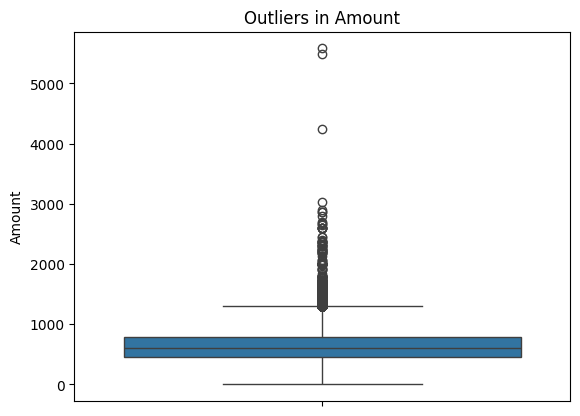

In [223]:
sns.boxplot(df['Amount'])
plt.title('Outliers in Amount')
plt.show()

- Remove the Outliers 

In [224]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df['Amount'] >= lower) & (df['Amount'] <= upper)]

- Fix the Outliers

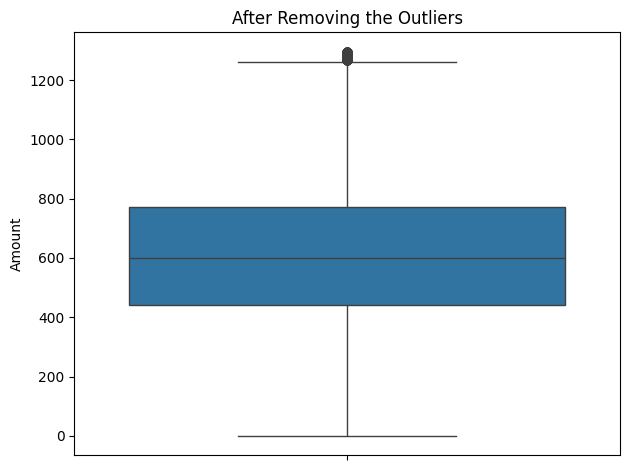

In [225]:
sns.boxplot(df['Amount'])
plt.title('After Removing the Outliers')
plt.tight_layout()
plt.show()

## Step 4: Data Visualization

### Products Selling

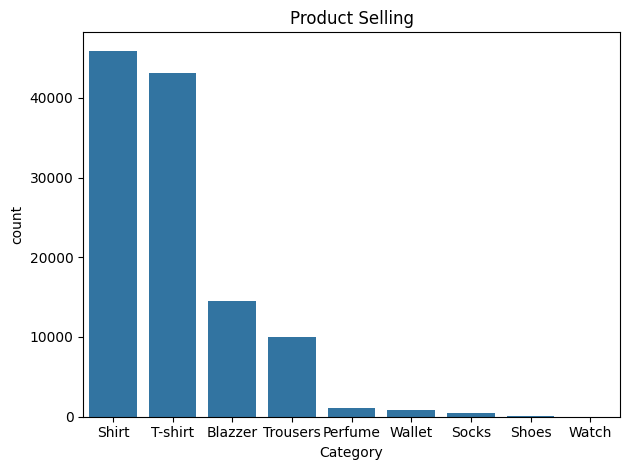

In [226]:
xs  = df['Category'].value_counts()
#plt.pie(xs, labels=xs.index, autopct='%1.2f%%')
sns.barplot(xs)
plt.title('Product Selling')
plt.tight_layout()
plt.show()

In [227]:
mon = df.groupby('Month')['Amount'].sum()
mon

Month
3       97939.85
4    27024240.05
5    23831361.21
6    21520447.03
Name: Amount, dtype: float64

### Total Sales by month

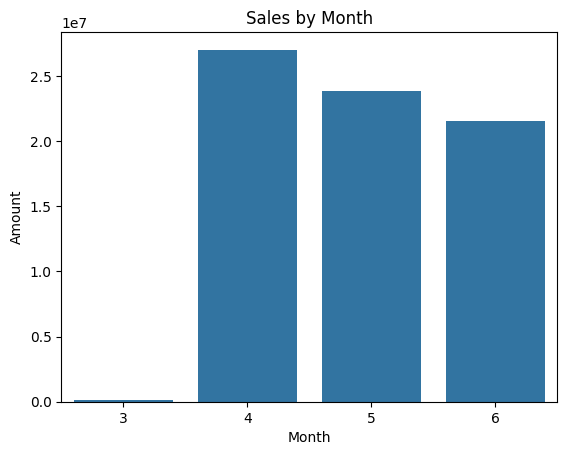

In [228]:
sns.barplot(mon)
plt.title('Sales by Month')
plt.show()


### Sales of Leading Month of 4

In [229]:
mon4 = df[df['Month']==4]
led = mon4.groupby('Category')['Qty'].sum()
led

Category
Blazzer      3691
Perfume       306
Shirt       17296
Shoes          62
Socks         162
T-shirt     16966
Trousers     3624
Wallet        370
Name: Qty, dtype: int64

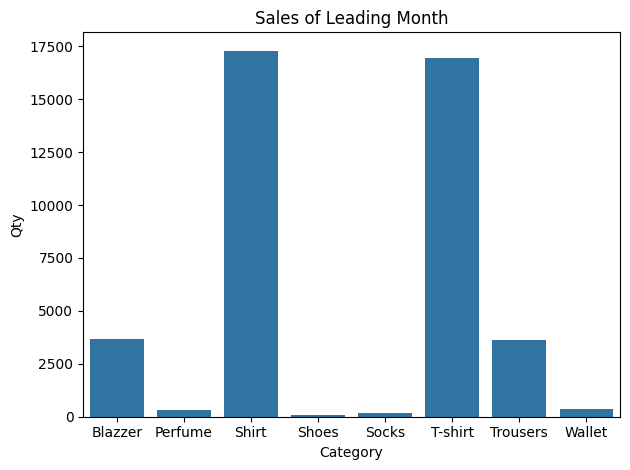

In [230]:
sns.barplot(led)
plt.title('Sales of Leading Month')
plt.tight_layout()
plt.show()

### Shipping Status

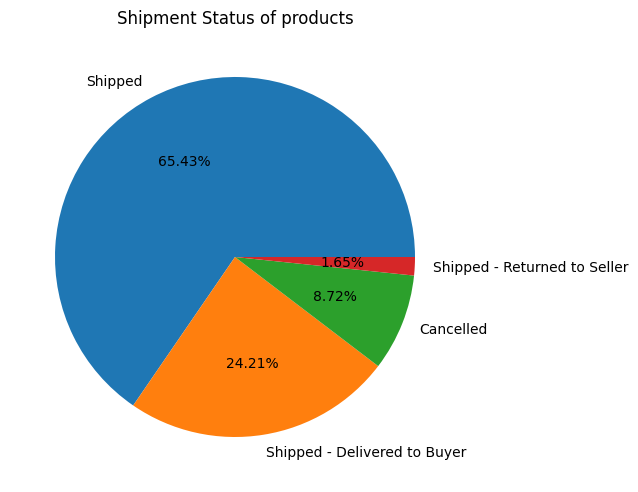

In [231]:
status = df['Status'].value_counts()
hstatus = status.head(4)
plt.pie(hstatus, labels=hstatus.index, autopct="%1.2f%%")
plt.tight_layout()
plt.title('Shipment Status of products')
plt.show()

### Service level of product

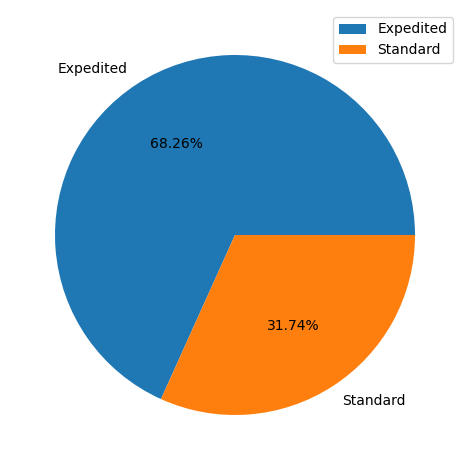

In [232]:
sat = df['ship-service-level'].value_counts()
plt.pie(sat, labels=sat.index, autopct="%1.2f%%")
plt.legend()
plt.tight_layout()
plt.show()

### Courier Status

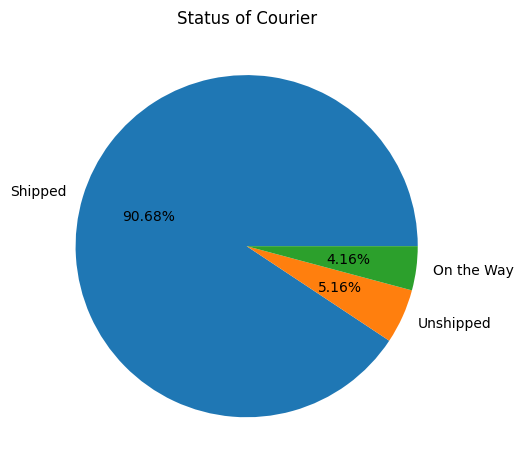

In [233]:
cs = df['Courier Status'].value_counts()
plt.pie(cs, labels=cs.index, autopct='%1.2f%%')
plt.title('Status of Courier')
plt.tight_layout()
plt.show()

### Orders cities top 5

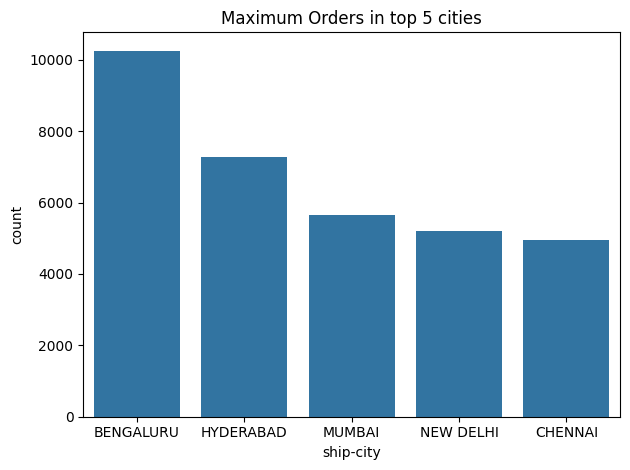

In [234]:
ord = df['ship-city'].value_counts()
ord.head()
sns.barplot(ord.head())
plt.title('Maximum Orders in top 5 cities')
plt.tight_layout()
plt.show()

In [235]:
df.columns

Index(['Date', 'Status', 'Fulfilment', 'ship-service-level', 'Category',
       'Size', 'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'B2B', 'Month'],
      dtype='object')

In [236]:
stat = df.groupby('Category')['ship-state'].nunique()
stat

Category
Blazzer     48
Perfume     36
Shirt       54
Shoes       20
Socks       27
T-shirt     57
Trousers    48
Wallet      29
Watch        2
Name: ship-state, dtype: int64

In [237]:
df['ship-city'].value_counts()

ship-city
BENGALURU       10257
HYDERABAD        7285
MUMBAI           5647
NEW DELHI        5213
CHENNAI          4957
                ...  
NIMAPADA            1
Siruguppa           1
JADUGORA            1
CHOORNIKKARA        1
Halol               1
Name: count, Length: 8561, dtype: int64